# Random walkers 

### Introduction
In this exercise, we're going to follow-up on the discussion in lecture with some actual computation regarding the random walking simulation. This is a simple version of a more general set of algorithms called a *Markov Chain Monte Carlo* or MCMC. These are extremely common in physics, chemistry, biology, economics, and industry generally.


### Learning Goals
You should learn a few things from this particular example, both technical and conceptual:

1. How to build a randomized array, or field, of values using a loop
1. Constructing a random path in two dimensions using those random steps
1. Visualizing the path constructed
1. Using built-in `numpy` library functions to build a randomize array of *steps*
1. Understand a few more methods for array slicing and selection in `python`
1. Using the cumulative summation function `cumsum` to turn the random steps into a randomized path
1. Using the `%timeit` function to evaluate the time required to execute the two approaches

### Code

First, let's import the libraries as usual. We will the numerical functions as well as the plotting functions

In [6]:
# Import the usual numpy and matplotlib libraries for numerical operations and plotting
import numpy as np
import matplotlib.pyplot as plt

I always recommend setting important parameters, such as the number of steps to take in your simulation, separately. Remember to re-run this, and all subsequent related functions, if you want to change the number of steps.

In [8]:
# define the number of steps 
nsteps      = 100000         # "Full" simulation
nsteps_test = 100            # "Fast" simulation

I strongly recommend creating a function for the random walk. My recommendation is to include a `debug` option, which you can use to turn on or off various pieces of detailed information related to the calculations you're running. 

In [4]:
# Make a function that does all of this for us    
def randomWalk(nsteps,debug=False):    
    
    #creating two array for containing x and y coordinate 
    #of size equals to the number of size and filled up with 0's 
    x = np.zeros(nsteps) 
    y = np.zeros(nsteps) 
    
    # Fill the x and y coordinates with random variables 
    for i in range(1, nsteps): 
        val = np.random.randint(1, 5) 
        
        # Always good to build into your code some debugging options
        if (debug and i<100): print("Random number = " + str(val))
        
        
        if val == 1: 
            x[i] = x[i - 1] + 1
            y[i] = y[i - 1] 
        elif val == 2: 
            x[i] = x[i - 1] - 1
            y[i] = y[i - 1] 
        elif val == 3: 
            x[i] = x[i - 1] 
            y[i] = y[i - 1] + 1
        else: 
            x[i] = x[i - 1] 
            y[i] = y[i - 1] - 1
    
    # Return the array of x and y values
    return [x,y]
    

### Visualizing the random walk

We want to take a look at this now, but perhaps just for a few steps (use the `nsteps_test` variable for this)

In [15]:
# We designed the function to return an array of `x` and `y` values.
walk = randomWalk(nsteps_test)

# Since we're only looking at a few steps, print out the actual values to make sure that they may sense
print(walk)

[array([ 0., -1., -1., -1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,
        0.,  0., -1., -1.,  0.,  1.,  2.,  2.,  1.,  2.,  3.,  3.,  3.,
        3.,  4.,  3.,  3.,  3.,  3.,  4.,  3.,  3.,  3.,  3.,  3.,  2.,
        2.,  2.,  3.,  2.,  1.,  2.,  2.,  2.,  3.,  3.,  4.,  4.,  4.,
        4.,  4.,  5.,  4.,  5.,  5.,  5.,  6.,  7.,  7.,  7.,  8.,  8.,
        9.,  9.,  9.,  8.,  9.,  9.,  9., 10.,  9., 10., 11., 11., 10.,
       10., 10.,  9., 10.,  9.,  8.,  9.,  8.,  7.,  7.,  7.,  7.,  7.,
        7.,  6.,  5.,  4.,  5.,  5.,  5.,  5.,  5.]), array([ 0.,  0.,  1.,  2.,  2.,  2.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
        1.,  2.,  2.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0., -1., -2.,
       -3., -3., -3., -4., -5., -6., -6., -6., -7., -6., -5., -6., -6.,
       -5., -4., -4., -4., -4., -4., -3., -2., -2., -1., -1., -2., -3.,
       -4., -5., -5., -5., -5., -4., -3., -3., -3., -4., -3., -3., -2.,
       -2., -3., -2., -2., -2., -3., -2., -2., -2., -2., -2., -1., -1.,
        0

In order to use this array functionality efficiently, we're going to want to slice it up. That is, extract certain portions of it for further manipulation.

To do this, we're going to use some basic operations. For example, the following operations select out rows of values which could represent three `x` values and then 3 `y` values:

~~~~
>>> a = np.array([[1,2,3], [4,5,6]])
>>> a
array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])
>>> a[0]
array([1, 2, 3])
>>> a[1]
array([4, 5, 6])
~~~~

With this in mind, we can easily provide the `x` and `y` coordinates to the `matplotlib` `plot` function for plotting:

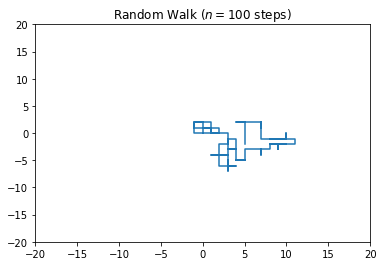

In [16]:
# The selection of ranges within a 2D array can be done using 
plt.plot(walk[0],walk[1],label= 'Random walk')
plt.title("Random Walk ($n = " + str(nsteps_test) + "$ steps)") 
plt.axis([-20,20,-20,20])
plt.show()

Now let's go for a longer walk, but let `matplotlib` figure out the axis ranges.

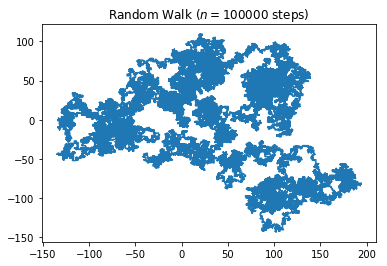

In [18]:
walk = randomWalk(nsteps)
plt.plot(walk[0],walk[1],label= 'Random walk')
plt.title("Random Walk ($n = " + str(nsteps) + "$ steps)") 
plt.show()

### Profiling and efficiency

You may not know it yet, but the above code is not very efficient, despite being exceptionally readable.

In [ ]:
def efficientWalk(nsteps,debug=False):    
    
    # Initialize an array with `nsteps` random integers -1 or 1
    #   -> begin with an array of length N with random integers between 0 (inclusive) and 2 (exclusive)
    #   -> multiply by two and subtract 1  changes the random integers 0 and 1 to -1 and 1 respectively
    randomized_steps = np.random.randint(0,2,(nsteps,2)) * 2 - 1  
    
    # Sum up the randomized steps in both x and y separately
    walk = np.cumsum(randomized_steps, axis=0)
    
    x = walk[:,0]  # slicing to extract the 0 column on the first axis
    y = walk[:,1]  # slicing to extract the 1 column on the first axis
    
    # Return the array of values
    return [x,y]


### Profiling 

Let’s use the profiling tool `%timeit` to look at a some examples of the speedup possible when using `python` and `numpy` more efficiently.

To quote the [blog from the Kinder & Nelson textbook](http://physicalmodelingwithpython.blogspot.com/2015/09/speeding-up-python-part-1-profiling.html),


> Before proceeding, I offer this advice: If your program already runs fast enough, 
> do not bother with profiling and optimization. There are an endless number of 
> interesting problems waiting to be solved, and the question of how to improve 
> the performance of a particular program by 20 percent is probably not one of them.


#### The `%timeit` Command

Try the same operations as before, but use the %timeit command instead of %time:

~~~~
%timeit 2**100
%timeit pow(2,100)
~~~~

The output should be something like this:

~~~~
$ %timeit 2**100
10000000 loops, best of 3: 45.4 ns per loop
~~~~

This means that Python inserted the command `2**100` inside a loop and carried out the operation ten million times. It evaluated 3 such loops. It recorded the total time for each loop, and then divided by 10 million. The best result from the 3 loops was an average execution time of 45.4 ns. 

In [2]:
%%timeit 
#debug=True    
walk = randomWalk(nsteps)
#print(walk)
#plt.plot(walk[0],walk[1],label= 'Random walk')
#plt.title("Random Walk ($n = " + str(nsteps) + "$ steps)") 
#plt.axis([-10,10,-10,10])
#plt.show()

242 ms ± 24.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
%%timeit

walk2 = efficientWalk(nsteps)
#print(walk)
#plt.plot(walk2[0],walk2[1],label = 'Efficient random walk')
#plt.title("Efficient random walk ($n = " + str(nsteps) + "$ steps)") 
#plt.axis([-10,10,-10,10])
#plt.show()

1.43 ms ± 3.97 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
